<hr style="border-width:4px;border-color:coral" />

# Reaction-diffusion models - Spiral waves

<hr style="border-width:4px;border-color:coral" />

You can use this notebook to plot spiral waves. 

* <a href="#read">Reading in data</a>

* <a href="#init">Plot the initial conditions</a>

* <a href="#plottime">Plotting output</a>

In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Running the spiral wave example

The code below is designed to take three arguments : the number of mesh cells in x and by directions, and the number of output files to produce.  For example

    $ spiral 128 128 40
    
will run on a mesh with $N_x=N_y=64$ mesh cells in each direction and will create 40 output files at times $t_0=0, t_1, t_2, ..., t_{39}=T$. 

In [7]:
%%bash

rm -rf spiral

# Use -O2 level optimization.  This should cut down on time 
gcc -o spiral -O2 spiral_serial.c -lm

time spiral 128 128 20


real	0m0.205s
user	0m0.184s
sys	0m0.016s


<a id="read"></a>

## Read meta data

Meta data is stored by the executable and read in here.  It is a good idea to check that everything that was read in is correct and agrees with what you expect.  

In [8]:
# Open file for reading; use binary mode
fout = open("spiral.out","rb")

# Read meta data
dt_meta = dtype([('Nx','int32'),('Ny','int32'),('ax','d'),('bx','d'), \
                 ('ay','d'),('by','d'),('M','int32')])
d = fromfile(fout,dtype=dt_meta, count=1)[0]

# create dictionary containing meta data
parms = dict(zip(dt_meta.fields,d))

# Print meta data from dictionary
print("Mesh cell dimensions : ({Nx:2d},{Ny:2d})".format(**parms))
print("")
print("Domain : [{ax:g},{bx:g}] x [{ay:g},{by:g}]".format(**parms))
print("")
print("Total number of time steps : {M:d}".format(**parms))
print("")

# Assign values in tuple directly (for use below)
Nx,Ny,ax,bx,ay,by,M = d

# Read solution data and count number of output steps.  This should match number
# set by the user in call to `heat2d`
dt_heat = dtype([('t','d'),('u','d',(Nx+1)*(Ny+1)),('v','d',(Nx+1)*(Ny+1))])  
data = fromfile(fout,dtype=dt_heat)
Mout = len(data) # Number of time steps output.
print("Number of output steps : {:d}".format(Mout))

# Close file
fout.close()

Mesh cell dimensions : (128,128)

Domain : [-20,20] x [-20,20]

Total number of time steps : 2049

Number of output steps : 20


## Create the 2d mesh

We create a 2d mesh needed for plotting. 

In [9]:
xe = linspace(ax,bx,Nx+1)
ye = linspace(ay,by,Ny+1)

dx = (bx-ax)/Nx
dy = (by-ay)/Ny

[xm,ym] = meshgrid(xe,ye)

<a id="init"></a>

## Plot the initial conditions

<IPython.core.display.Javascript object>


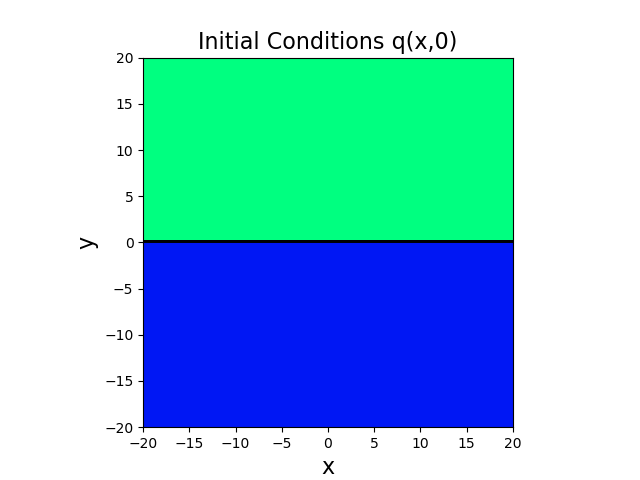

In [10]:
# Plot initial conditions
figure(1)
clf()

set_cmap('winter')

u = reshape(data[0][1],(Nx+1,Ny+1)).T
pcolormesh(xm,ym,u,vmin=-0.1,vmax=1)

cv = linspace(0.1,0.9,11)
cont = contour(xm,ym,u,colors='k',levels=cv,linewidths=0.5)

gca().set_aspect(1)

title('Initial Conditions q(x,0)',fontsize=16)
xlabel('x',fontsize=16)
ylabel('y', fontsize=16)
show()

In [ ]:
figure(1)
#savefig('heat_0.png', dpi=Nx, facecolor=None, edgecolor=None,
#        format='png',transparent=False, bbox_inches='tight', pad_inches=0.1,metadata=None)

<a id="plottime"></a>

## Plot the solution in time

<IPython.core.display.Javascript object>


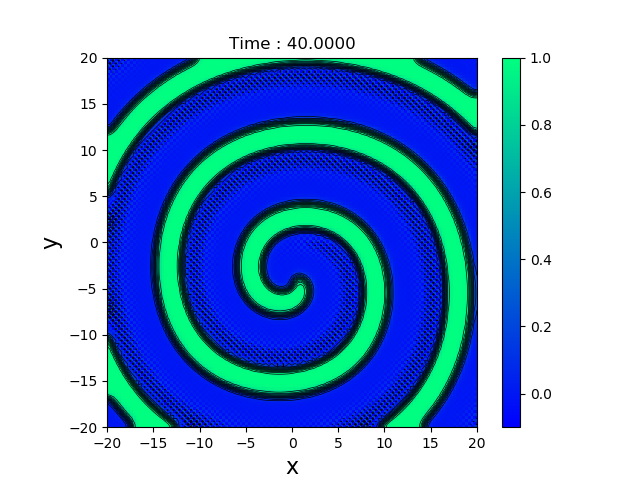

qmax =   1.00000000e+00
qmin =   0.00000000e+00
qmax =   1.10532290e+00
qmin =  -2.20959931e-01
qmax =   1.10901021e+00
qmin =  -2.35250880e-01
qmax =   1.12636727e+00
qmin =  -1.47633636e-01
qmax =   1.13193536e+00
qmin =  -1.29661292e-01
qmax =   1.13641652e+00
qmin =  -1.72004100e-01
qmax =   1.00491857e+00
qmin =  -1.57486668e-01
qmax =   1.02177155e+00
qmin =  -1.67373521e-01
qmax =   1.00103163e+00
qmin =  -1.37048419e-01
qmax =   1.00716497e+00
qmin =  -1.47565625e-01
qmax =   1.00261640e+00
qmin =  -1.28684764e-01
qmax =   1.00389033e+00
qmin =  -1.35326488e-01
qmax =   1.00159101e+00
qmin =  -1.37431851e-01
qmax =   1.00098176e+00
qmin =  -1.53511254e-01
qmax =   1.00269659e+00
qmin =  -1.33972282e-01
qmax =   1.00351355e+00
qmin =  -1.34870728e-01
qmax =   1.00116484e+00
qmin =  -1.50904179e-01
qmax =   1.00303311e+00
qmin =  -1.30350809e-01
qmax =   1.00252371e+00
qmin =  -1.31636850e-01
qmax =   1.00012783e+00
qmin =  -1.46781776e-01


In [11]:
# %%timeit -n 1 -r 1

# Plot initial solution and store handle
fig = figure(2)
clf()

u = reshape(data[0][1],(Nx+1,Ny+1)).T
mesh = pcolormesh(xm,ym,u,shading='flat',vmin=-0.1,vmax=1)
    
# Set up contour lines
cv = linspace(0.1,0.9,11)
cont = contour(xm,ym,u,colors='k',levels=cv,linewidths=0.5)

# Add title, axis labels, etc
htitle = title('Time : {:.4f}'.format(0))
xlabel('x',fontsize=16)
ylabel('y', fontsize=16) 

colorbar(mesh)

# Make axis square
gca().set_aspect(1)

# Refresh plot
fig.canvas.draw()     

pause(0.25)

for n in range(0,Mout):

    t = data[n][0]
    
    u = reshape(data[n][1],(Nx+1,Ny+1)).T
    #q = data[n][1]
    mesh.set_array(u[:-1,:-1].ravel())

    # Plot contour lines
    for c in cont.collections:
        c.remove()
    cont = contour(xm,ym,u,colors='k',levels=cv,linewidths=0.5)

    # Update title with new time
    htitle.set_text('Time : {:.4f}'.format(t))

    # Make axis square
    gca().set_aspect(1)

    # Refresh plot
    fig.canvas.draw()        
    
    pause(0.02)
    
    print("qmax = {:16.8e}".format(u.max()))
    print("qmin = {:16.8e}".format(u.min()))

In [ ]:
figure(2)
savefig('spiral_1.png', dpi=Nx, facecolor=None, edgecolor=None,
        format='png',transparent=False, bbox_inches='tight', pad_inches=0.1,metadata=None)